In [37]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

In [2]:
support_tickets = pd.read_csv('support_tickets.csv')
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [3]:
users_evaluation = pd.read_csv('users_evaluation_of_satisfaction.csv')
users_evaluation.head()

,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


In [4]:
new_items = pd.read_csv('new_items_by_support_users.csv')
new_items.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


## Вычислим как влияет время ответа техподдержки на следующие параметры:
* Оценка
* Количество объявлений после обращения


In [5]:
support_tickets['activity_start_dt'] = pd.to_datetime(support_tickets['activity_start_dt'])
support_tickets['fact_reaction_dt'] = pd.to_datetime(support_tickets['fact_reaction_dt'])

In [6]:
support_tickets['duration'] = support_tickets['fact_reaction_dt'] - support_tickets['activity_start_dt']

In [7]:
users_evaluation['result_mentioned_by_user'] = users_evaluation['result_mentioned_by_user'].map(
    {'Отлично': 5, 'Хорошо': 4, 'Нейтрально': 3, 'Удовлетворительно': 2, 'Не удовлетворительно': 1})

In [8]:
users_evaluation = users_evaluation.groupby('request_id', as_index=False).mean()

In [9]:
support_tickets_w_ev = pd.merge(support_tickets, users_evaluation, how='inner', on='request_id')

In [10]:
support_tickets_w_ev.drop(support_tickets_w_ev.loc[
    support_tickets_w_ev['duration'] <= pd.to_timedelta(0)].index, inplace=True)

In [11]:
def to_hours(date):
    return date.total_seconds() / 60 / 60

In [12]:
support_tickets_w_ev['duration'] = support_tickets_w_ev['duration'].apply(to_hours)

In [13]:
support_tickets_w_ev['timegroup'] = pd.qcut(support_tickets_w_ev['duration'], 10)

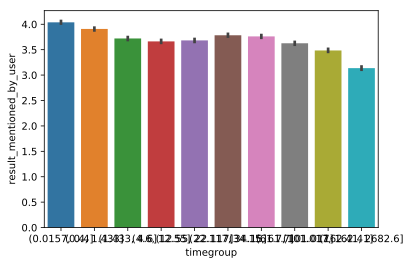

In [14]:
sns.barplot(x='timegroup', y='result_mentioned_by_user', data=support_tickets_w_ev)

In [15]:
# Кажется, время ответа особо не влияет на оценку
# Проверить, как влияет на количество объявлений после

In [65]:
num_of_items_after = support_tickets[['user_id', 'request_id', 'activity_start_dt', 'fact_reaction_dt']]
num_of_items_after.head()

,user_id,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [17]:
new_items['item_starttime'] = pd.to_datetime(new_items['item_starttime'])

In [18]:
# %%time
# num_after = []
# for row in num_of_items_after.itertuples():
#     num_after.append(new_items.loc[(new_items['user_id'] == row.user_id) & 
#               (new_items['item_starttime'] > pd.to_datetime(row.fact_reaction_dt))].count()[0])

In [66]:
num_of_items_after['user_id'] = num_of_items_after['user_id'].apply(lambda x: int(x.encode('ascii', 'ignore')))
new_items['user_id'] = new_items['user_id'].apply(lambda x: int(x.encode('ascii', 'ignore')))

In [84]:
# %%time
# a = np.array([])
# for user_id, df in num_of_items_after.groupby('request_id'):
#     a = np.append(a, new_items.loc[(new_items['user_id'] == df['user_id'].values[0]) & 
#                         (new_items['item_starttime'] > df['fact_reaction_dt'].values[0])].count()[0])
#     if len(a) % 1000 == 0:
#         print(len(a))

ValueError: Can only compare identically-labeled Series objects

In [21]:
# надо удалить из new_items тех, кого нет в в другой таблице

In [22]:
# new_items.groupby('user_id')['item_id'].count()

In [ ]:
№pd.merge_asof(num_of_items_after)

In [85]:
new_items.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386341477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6790750024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2755740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [88]:
new_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18559923 entries, 0 to 18559922
Data columns (total 7 columns):
user_id                    int64
user_registration_time     object
user_first_listing_date    object
item_id                    object
item_starttime             datetime64[ns]
item_category              object
item_subcategory           object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 991.2+ MB


In [87]:
num_of_items_after.head()

,user_id,request_id,activity_start_dt,fact_reaction_dt
0,370518212,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2138799,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2033101,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177122000003,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37340500064,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [90]:
num_of_items_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397530 entries, 0 to 397529
Data columns (total 4 columns):
user_id              397530 non-null int64
request_id           397530 non-null object
activity_start_dt    397530 non-null datetime64[ns]
fact_reaction_dt     397530 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 12.1+ MB
